In [167]:
import torchvision.transforms as transforms
import torchvision.models as models
import cv2 as cv2
import torch_dct as dct
import torch.nn.functional as F
import torch.nn as nn
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [168]:
def read_img(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_tensor = transforms.ToTensor()(img)
    print(img_tensor.size())
    return img_tensor

In [169]:
def show_tensor(tensor,width=200,height=200):
    tensor_img = transforms.ToPILImage()(tensor)
    display(tensor_img.resize((width,height)))

torch.Size([3, 1037, 1037])


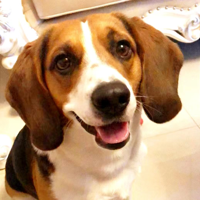

In [170]:
fn = 'imgs/beagle.jpg'
img_tensor = read_img(fn)
show_tensor(img_tensor)

In [171]:
def dct_tensor(tensor):
    img_dct = dct.dct(tensor)
    show_tensor(img_dct)

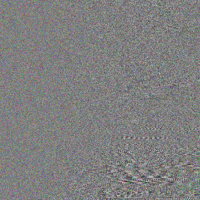

In [172]:
img_tensor_dct = dct_tensor(img_tensor)

In [173]:
rn50 = models.resnet50(weights='IMAGENET1K_V1')

In [174]:
model = nn.Sequential(transforms.Resize([224,224]),
                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                      rn50)
model = model.cuda()

In [182]:
def predict_1_img(img_tensor,model):
    res = model(img_tensor.unsqueeze(0).cuda())
    label = res[0].argmax().item()
    prob = F.softmax(res,dim=1)[0].max()
    return label, prob

In [183]:
print(predict_1_img(img_tensor,model))

(463, tensor(0.0061, device='cuda:0', grad_fn=<MaxBackward1>))


In [184]:
res = model(img_tensor.unsqueeze(0).cuda())

In [185]:
res_sm = F.softmax(res,dim=1)